In [3]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white") # setting the seaborn style

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

facebook_data = pd.read_csv('data/facebook.csv', sep=';', na_values='NaN', keep_default_na=False)

##  Given Data Dictionary
1. Type: Type of post. Possible outcomes are “Link”, “Photo”, “Status”, and “Video” 
2. Month: Month of the year for the post. 
3. Weekday: Day of the week for the post. 
4. Hour: Hour of the day - between 0 (12:00AM) and 23 (11:00PM) 
5. Paid: Dummy variable equal to 1 if a paid post, 0 if a free or unsolicited post. 
6. Reach: Number of unique individuals who saw the post appear on their news feeds. 
7. Impressions: Number of times the post appeared on people’s news feeds (some individuals 
may have had the post appear more than once) 
8. EngagedUsers: Number of unique individuals that clicked anywhere in the post. 
9. Comments: Number of comments on the post. 
10. Likes: Number of likes for the post 
11. Shares: Number of shares for the post 
12. Interactions: The sum, Comments + Likes + Shares. 
13. Lifetime Post organic reach: Lifetime The number of people who saw your Page post in 
News Feed or ticker, or on your Page's Timeline. (Unique Users)
14. Lifetime Engaged users (formerly "Lifetime Post Engaged Users") Lifetime The number of 
people who clicked anywhere in your posts. (Unique Users)
15. Lifetime Talking About This: Lifetime The number of unique people who created a story by 
interacting with your Page post. (Unique Users)
16. Lifetime Post reach by people who like your Page: Lifetime The number of people who saw 
your Page post because they've liked your Page (Unique Users)


In [325]:
facebook_data.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393
5,139441,Status,2,12,1,9,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186
6,139441,Photo,3,12,1,3,1,11692,19479,481,265,364,15432,9328,379,3,249,27,279
7,139441,Photo,3,12,7,9,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339
8,139441,Status,2,12,7,3,0,11844,22538,1530,1407,1692,15220,7912,1250,0,161,31,192
9,139441,Photo,3,12,6,10,0,4694,8668,280,183,250,4309,2324,199,3,113,26,142


In [326]:
facebook_data.tail(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
490,85979,Photo,3,1,6,11,0,5280,8703,951,911,1237,5757,3300,431,1,79,30,110
491,85979,Photo,3,1,6,3,1,6184,10228,956,901,1140,6085,3502,437,1,105,46,152
492,85979,Link,1,1,5,11,0,45920,5808,753,655,763,15766,10720,220,0,128,9,137
493,85093,Photo,3,1,1,2,0,8412,13960,1179,1111,1632,8632,5348,699,17,185,55,257
494,85093,Photo,3,1,7,10,0,5400,9218,810,756,1003,5654,3230,422,10,125,41,176
495,85093,Photo,3,1,7,2,0,4684,7536,733,708,985,4750,2876,392,5,53,26,84
496,81370,Photo,2,1,5,8,0,3480,6229,537,508,687,3961,2104,301,0,53,22,75
497,81370,Photo,1,1,5,2,0,3778,7216,625,572,795,4742,2388,363,4,93,18,115
498,81370,Photo,3,1,4,11,0,4156,7564,626,574,832,4534,2452,370,7,91,38,136
499,81370,Photo,2,1,4,4,,4188,7292,564,524,743,3861,2200,316,0,91,28,119


In [327]:
print(facebook_data.columns)
# a more specific look into the variables present

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')


# My Data Dictionary
1. Page total likes: The total number of likes on a page
2. Type: Type of post. Possible outcomes are “Link”, “Photo”, “Status”, and “Video” 
3. Post Month: Month of the year for the post
4. Post Weekday: Day of the week for the post
5. Post Hour: Hour of the day - between 0 (12:00AM) and 23 (11:00PM)
6. Paid: Dummy variable equal to 1 if a paid post, 0 if a free or unsolicited post
7. Lifetime Post Total Reach: Lifetime number of unique individuals who saw the post appear on their news feeds
8. Lifetime Post Total Impressions: Lifetime number of times the post appeared on people’s news feeds (some individuals may have had the post appear more than once)
9. Lifetime Engaged Users: (formerly "Lifetime Post Engaged Users") Lifetime The number of people who clicked anywhere in your posts (Unique Users)
10. Lifetime Post Impressions by people who have liked your Page
11. Lifetime Post reach by people who like your Page: Lifetime The number of people who saw your Page post because they've liked your Page (Unique Users)
12. Lifetime People who have liked your page and engaged with your post: Lifetime The number of people who saw your Page post because they've liked your Page, and then engaged with a post
13. comment: Number of comments on the post
14. like: Number of likes for the post 
15. share: Number of shares for the post 
16. Total Interactions: he sum, Comments + Likes + Shares

### Since I was unable to define 3 of the columns, I will remove them from the data frame to avoid any unsupported analysis

# Data Clean Up
### Removing Undefined Columnns and Outliers

In [328]:
facebook_data.drop(['Category', 'Lifetime Post Consumers', 'Lifetime Post Consumptions'], inplace=True, axis=1) 
# removing the colums that were unable to be defined by the data dictionary


In [329]:
facebook_data.head(1)

,Page total likes,Type,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,12,4,3,0,2752,5091,178,3078,1640,119,4,79,17,100


In [330]:
print(facebook_data.columns) # the final defined variables presenet for analaysis

Index(['Page total likes', 'Type', 'Post Month', 'Post Weekday', 'Post Hour',
       'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions',
       'Lifetime Engaged Users',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')


In [331]:
facebook_data.dtypes #checking data types

Page total likes                                                        int64
Type                                                                   object
Post Month                                                              int64
Post Weekday                                                            int64
Post Hour                                                               int64
Paid                                                                   object
Lifetime Post Total Reach                                               int64
Lifetime Post Total Impressions                                         int64
Lifetime Engaged Users                                                  int64
Lifetime Post Impressions by people who have liked your Page            int64
Lifetime Post reach by people who like your Page                        int64
Lifetime People who have liked your Page and engaged with your post     int64
comment                                                         

In [332]:
facebook_data['Type'] = facebook_data['Type'].astype('category')
facebook_data['Paid'] = facebook_data['Paid'].astype('category')
facebook_data['like'] = pd.to_numeric(facebook_data['like'], errors='coerce').astype('float64')
facebook_data['share'] = pd.to_numeric(facebook_data['share'], errors='coerce').astype('float64')


In [333]:
facebook_data.dtypes

Page total likes                                                          int64
Type                                                                   category
Post Month                                                                int64
Post Weekday                                                              int64
Post Hour                                                                 int64
Paid                                                                   category
Lifetime Post Total Reach                                                 int64
Lifetime Post Total Impressions                                           int64
Lifetime Engaged Users                                                    int64
Lifetime Post Impressions by people who have liked your Page              int64
Lifetime Post reach by people who like your Page                          int64
Lifetime People who have liked your Page and engaged with your post       int64
comment                                 

In [334]:
def calc_zscore(name): # set up function
    facebook_data[name + '_zscore']=stats.zscore(facebook_data[name], nan_policy='omit') # calculate zscore, bypass nan

calc_zscore('share') 
calc_zscore('like')
calc_zscore('comment')

def filter_outliers(name):
    return facebook_data.query(f'abs({name + "_zscore"}) < 3') # filter to eliminate outliers from data 

# The Best Time to Post
- Tuesday is the best day to post to get maximum engagement
- 5am is the best time of day to post to reach maximum engagement

In [335]:
df1 = facebook_data.groupby('Post Weekday')['like', 'comment', 'share', 'Total Interactions'].mean()
df1

# The average number of engagement each day of the week


/var/folders/gl/dgfk6pp96hnc971h2_v5dbqr0000gp/T/ipykernel_26458/3226795630.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = facebook_data.groupby('Post Weekday')['like', 'comment', 'share', 'Total Interactions'].mean()


,like,comment,share,Total Interactions
Post Weekday,,,,
1,204.338235,7.926471,24.764706,237.029412
2,167.212121,6.530303,26.712121,200.454545
3,236.640625,13.593750,37.531250,287.765625
4,218.750000,10.208333,31.569444,260.527778
5,172.149254,6.089552,27.484848,205.313433
6,135.937500,5.296296,23.537500,162.802469
7,128.780488,4.012195,21.312500,153.585366


In [336]:
crosstab = pd.crosstab(facebook_data['Post Weekday'],facebook_data['like'])  

Ho = 'Post Weekday has no effect on likes'   
Ha = 'Post Weekday has an effect on likes' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


crosstab = pd.crosstab(facebook_data['Post Weekday'],facebook_data['comment'])  

Ho = 'Post Weekday has no effect on comments'   
Ha = 'Post Weekday has an effect on comments' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


crosstab = pd.crosstab(facebook_data['Post Weekday'],facebook_data['share'])  

Ho = 'Post Weekday has no effect on shares'   
Ha = 'Post Weekday has an effect on shares' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

crosstab = pd.crosstab(facebook_data['Post Weekday'],facebook_data['Total Interactions'])  

Ho = "Post Weekday has no effect on Total Interactions"   
Ha = "Post Weekday has an effect on Total Interactions"   

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Post Weekday has no effect on likes as the p_value (0.114) > 0.05
Post Weekday has no effect on comments as the p_value (0.38) > 0.05
Post Weekday has an effect on shares as the p_value (0.046) < 0.05
Post Weekday has an effect on Total Interactions as the p_value (0.033) < 0.05


In [337]:
df2 = facebook_data.groupby('Post Hour')['like', 'comment', 'share','Total Interactions'].mean()
df2

# The average number of engagement each hour

/var/folders/gl/dgfk6pp96hnc971h2_v5dbqr0000gp/T/ipykernel_26458/165272504.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = facebook_data.groupby('Post Hour')['like', 'comment', 'share','Total Interactions'].mean()


,like,comment,share,Total Interactions
Post Hour,,,,
1,146.500000,6.500000,28.000000,181.000000
2,155.666667,8.051282,27.384615,191.102564
3,192.638095,6.247619,29.704762,228.590476
4,137.571429,6.771429,23.742857,168.085714
5,569.923077,32.076923,82.307692,684.307692
6,132.750000,3.312500,22.466667,157.125000
7,127.923077,2.307692,18.230769,148.461538
8,79.454545,2.916667,15.818182,90.250000
9,113.500000,3.466667,16.689655,133.100000


In [338]:
crosstab = pd.crosstab(facebook_data['Post Hour'],facebook_data['like'])  

Ho = 'Post Hour has no effect on likes'   
Ha = 'Post Hour has an effect on likes' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


crosstab = pd.crosstab(facebook_data['Post Hour'],facebook_data['comment'])  

Ho = 'Post Hour has no effect on comments'   
Ha = 'Post Hour has an effect on comments' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


crosstab = pd.crosstab(facebook_data['Post Hour'],facebook_data['share'])  

Ho = 'Post Hour has no effect on shares'   
Ha = 'Post Hour has an effect on shares' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


crosstab = pd.crosstab(facebook_data['Post Hour'],facebook_data['Total Interactions'])  

Ho = "Post Hour has no effect on Total Interactions"   
Ha = "Post Hour has an effect on Total Interactions"   

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Post Hour has no effect on likes as the p_value (0.999) > 0.05
Post Hour has no effect on comments as the p_value (0.896) > 0.05
Post Hour has no effect on shares as the p_value (1.0) > 0.05
Post Hour has no effect on Total Interactions as the p_value (0.957) > 0.05


In [339]:
df4 = facebook_data.groupby('Post Month')['like', 'comment', 'share','Total Interactions'].mean()
df4

/var/folders/gl/dgfk6pp96hnc971h2_v5dbqr0000gp/T/ipykernel_26458/1605733650.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df4 = facebook_data.groupby('Post Month')['like', 'comment', 'share','Total Interactions'].mean()


,like,comment,share,Total Interactions
Post Month,,,,
1,122.880000,5.960000,31.760000,160.600000
2,192.961538,10.538462,38.538462,242.038462
3,83.111111,2.888889,11.055556,97.055556
4,182.740000,5.320000,29.460000,217.520000
5,216.162162,7.918919,32.216216,256.297297
6,133.612245,6.469388,17.632653,157.714286
7,272.519231,15.326923,40.653846,328.500000
8,198.441176,5.705882,21.235294,225.382353
9,230.944444,11.027778,37.571429,278.500000


In [340]:
crosstab = pd.crosstab(facebook_data['Post Month'],facebook_data['like'])  

Ho = 'Post Month has no effect on likes'   
Ha = 'Post Month has an effect on likes' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


crosstab = pd.crosstab(facebook_data['Post Month'],facebook_data['comment'])  

Ho = 'Post Month has no effect on comments'   
Ha = 'Post Month has an effect on comments' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


crosstab = pd.crosstab(facebook_data['Post Month'],facebook_data['share'])  

Ho = 'Post Month has no effect on shares'   
Ha = 'Post Month has an effect on shares' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')


crosstab = pd.crosstab(facebook_data['Post Month'],facebook_data['Total Interactions'])  

Ho = 'Post Month has no effect on Total Interactions'   
Ha = 'Post Month has an effect on Total Interactions' 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # setting significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Post Month has no effect on likes as the p_value (0.307) > 0.05
Post Month has no effect on comments as the p_value (0.067) > 0.05
Post Month has an effect on shares as the p_value (0.001) < 0.05
Post Month has no effect on Total Interactions as the p_value (0.364) > 0.05


# Overview of Trends
## Page Total Likes, Engaged Users, Post Consumptions, Post Reach

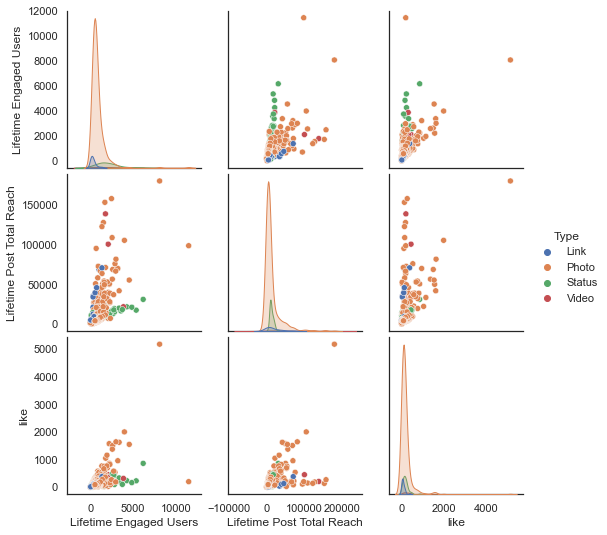

In [341]:
sns.pairplot(facebook_data, hue='Type', 
        x_vars= ['Lifetime Engaged Users','Lifetime Post Total Reach', 'like'], 
        y_vars= ['Lifetime Engaged Users','Lifetime Post Total Reach', 'like'])

### Trends that emerge
- photos are the most common type of media
- Status tends to have more engagement than the other types of media do
- Trends are shown with likes and Engaged Users, and Post Total Reach

<AxesSubplot:>

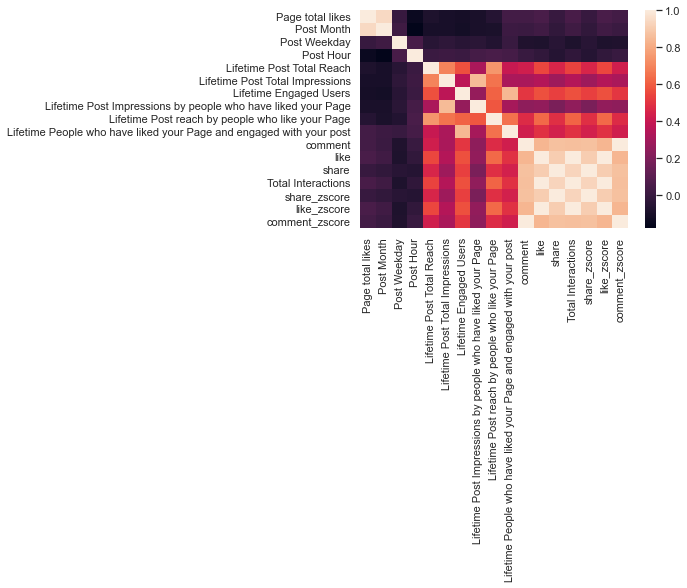

In [342]:
sns.heatmap(facebook_data.corr())

# Categorical Analysis

In [343]:
df3 = facebook_data.groupby('Type')['Total Interactions'].mean()
df3

Type
Link       89.045455
Photo     216.579812
Status    217.044444
Video     295.857143
Name: Total Interactions, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Count'>

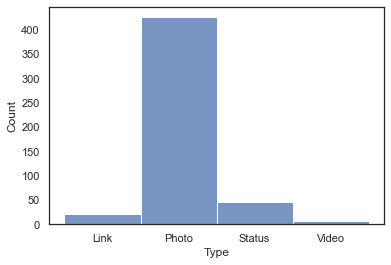

In [345]:
sns.histplot(x="Type", # load the graph and variable
    data=facebook_data,)

# shows which type of media is most common

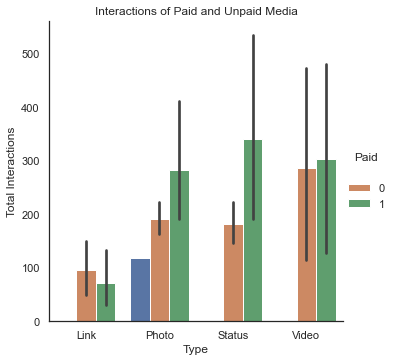

In [346]:
g = sns.catplot(x="Type", y="Total Interactions", # load the graph and variables
        hue="Paid", kind="bar", data=facebook_data) # hue distinguishes Paid v. Unpaid, kind commands type of graph, and data loads the dataset
g.set(title= 'Interactions of Paid and Unpaid Media') # sets the title

# This shows the number of interactions within each type, distinguishing paid v unpaid
# The bar dispays the margin of error, which displays the confidence level

- when looking at Paid v. Free media from this point of view, there is a signiciant relationship with Paid Status and Photo Updates
- Paid links have less interaction that free links

In [347]:
facebook_data.sort_values(by=['like'], ascending = False) #sorts data by top photos liked, in order from most to least liked

# looking for charachteristics of top liked photos

,Page total likes,Type,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,share_zscore,like_zscore,comment_zscore
244,130791,Photo,7,3,5,1,180480,319133,8072,108752,51456,3316,372,5172.0,790.0,6334,17.917037,15.457901,17.226978
379,111620,Photo,4,1,14,1,105632,147918,3984,48575,27328,1936,51,1998.0,128.0,2177,2.366294,5.633543,2.056644
349,117764,Photo,5,5,13,0,81856,124753,3000,52477,27392,1756,45,1639.0,122.0,1806,2.225351,4.522344,1.773086
168,135428,Photo,9,3,10,0,41984,68290,3370,34802,20928,2126,144,1622.0,208.0,1974,4.245538,4.469724,6.451787
3,139441,Photo,12,2,10,1,50128,87991,2211,61027,32048,1386,58,1572.0,147.0,1777,2.812614,4.314961,2.387461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,138414,Photo,12,7,10,0,1384,2467,15,2196,1172,15,0,0.0,0.0,0,-0.640496,-0.550789,-0.353596
100,137020,Photo,10,4,9,1,1357,2453,37,2154,1120,32,0,0.0,0.0,0,-0.640496,-0.550789,-0.353596
441,98195,Photo,3,5,4,1,1845,2670,9,1614,1008,9,0,0.0,0.0,0,-0.640496,-0.550789,-0.353596
417,104070,Photo,3,3,10,0,1874,2474,25,1483,1062,15,0,0.0,0.0,0,-0.640496,-0.550789,-0.353596


- Top 2 Liked posts were paid photos, and have signigifantly higher lifetime reach when compared to the next two unpaid photos

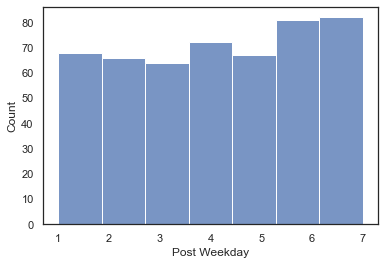

In [348]:
g = sns.histplot(data=facebook_data, # graph command and the data loaded
        x='Post Weekday', bins= 7) # variable, and number of bins

# displays the most frequent posting day

[Text(0.5, 1.0, 'Shares by Type')]

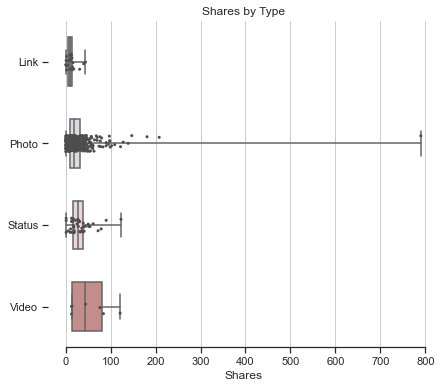

In [349]:
sns.set_theme(style="ticks") # setting the stye 
f, ax = plt.subplots(figsize=(7, 6)) # configuring size

sns.boxplot(x="share", y="Type", data=facebook_data, # creating box/whisker plot, determining variables
            whis=[0, 100], width=.6, palette="vlag") 

sns.stripplot(x="share", y="Type", data=facebook_data, # adding the scatter plot overlay 
              size=3, color=".3", linewidth=0)

ax.xaxis.grid(True) # tweaking visual prefrences
ax.set(ylabel='')
ax.set(xlabel='Shares')
sns.despine(trim=True, left=True)
ax.set(title='Shares by Type')

[Text(0.5, 1.0, 'Shares by Type')]

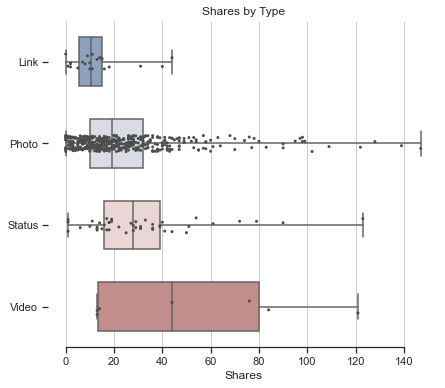

In [350]:
sns.set_theme(style="ticks") # setting the stye 
f, ax = plt.subplots(figsize=(7, 6)) # configuring size

filtered_shares = filter_outliers('share') # using function to filter outliers

sns.boxplot(x="share", y="Type", data=filtered_shares, # creating box/whisker plot, determining variables
            whis=[0, 100], width=.6, palette="vlag") 

sns.stripplot(x="share", y="Type", data=filtered_shares, # adding the scatter plot overlay 
              size=3, color=".3", linewidth=0)

ax.xaxis.grid(True) # tweaking visual prefrences
ax.set(ylabel='')
ax.set(xlabel='Shares')
sns.despine(trim=True, left=True)
ax.set(title='Shares by Type')

# Regression Analysis

<AxesSubplot:xlabel='Post Month', ylabel='Total Interactions'>

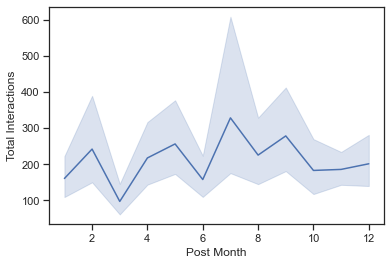

In [351]:
sns.lineplot(x="Post Month", y="Total Interactions", # load the graph and variables
    data=facebook_data) # load the data set

# This shows the interactions per post per month, with the shading showing regression

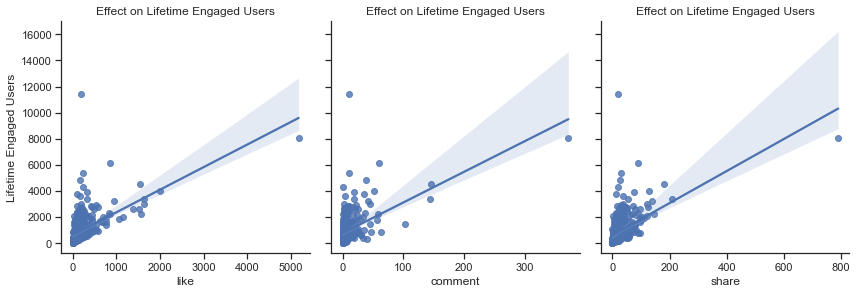

In [352]:
g = sns.PairGrid(facebook_data, # graph command
        y_vars=['Lifetime Engaged Users'], # x axis
        x_vars=['like', 'comment', 'share'], # y axis
            height=4) # controlls the size of the graph
g.map(sns.regplot) #creates the regression plot
g.set(title= 'Effect on Lifetime Engaged Users') #changes the title


# Trend line is shown, with the shading showing regression

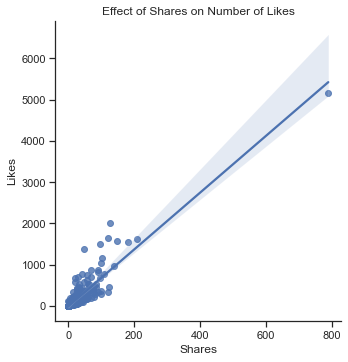

In [353]:
g = sns.lmplot(x="share", y="like", data=facebook_data) # Create the graph
g.set_xlabels('Shares') # Rename the X Axis
g.set_ylabels('Likes') # Rename the Y Axis
g.set(title= 'Effect of Shares on Number of Likes') # Set a title

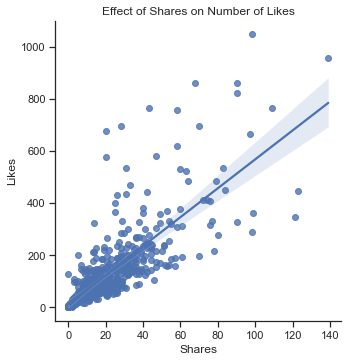

In [354]:
filtered_likes = filter_outliers('like')

g = sns.lmplot(x="share", y="like", data=filtered_likes) # Create the graph
g.set_xlabels('Shares') # Rename the X Axis
g.set_ylabels('Likes') # Rename the Y Axis
g.set(title= 'Effect of Shares on Number of Likes') # Set a title
